In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

In [3]:
df = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

df_full = pd.concat([df, df_test], ignore_index=True, sort=False)

# df = df_full

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [5]:
null = df.isnull().sum().sort_values(ascending=False)
percentage_of_null = round(null/df.isnull().count()*100,2)

pd.concat([null,percentage_of_null],axis=1,keys=['Total','Missing %'])


,Total,Missing %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


### What is the highest age group that survived?

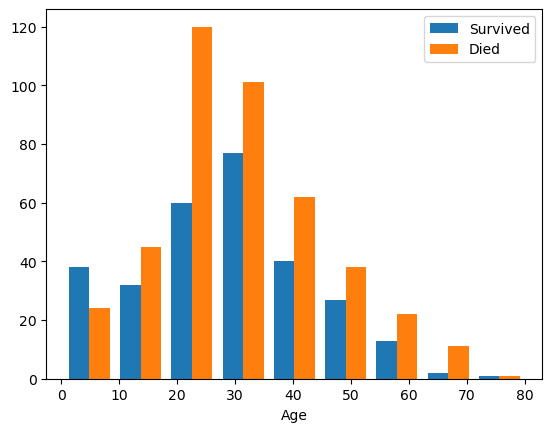

In [6]:
survived = df[df['Survived']==1].Age
died     = df[df['Survived']==0].Age

plt.hist([survived,died], bins=9,label=['Survived','Died'])
plt.rcParams["figure.figsize"] = (5,5)

plt.xlabel("Age")
plt.legend(labels=['Survived','Died'])

plt.show()

### Comparing the surival rate of men and women

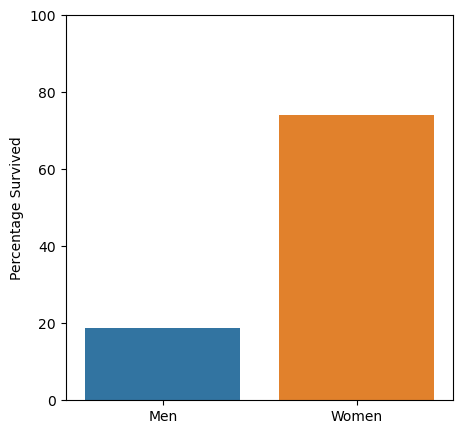

In [7]:
men   = df[df['Sex']=='male']
women = df[df['Sex']=='female']

rate_m = len(men[men['Survived']==1]) / len(men.Survived)
rate_f = len(women[women['Survived']==1]) / len(women.Survived)

plt.ylim(0,100)
plt.ylabel("Percentage Survived")
sns.barplot(["Men","Women"],[rate_m*100,rate_f*100])
plt.show()

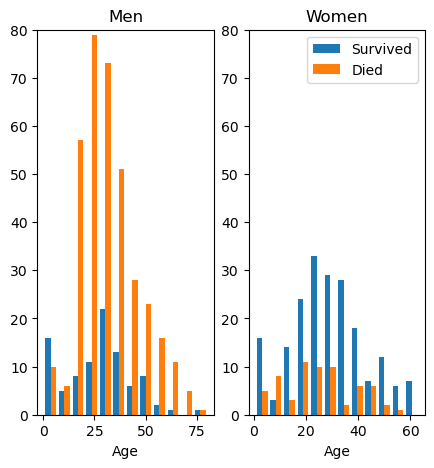

In [8]:
bins = 12

men   = df[df['Sex']=='male']
women = df[df['Sex']=='female']

survived_m = men[men['Survived']==1].Age
died_m     = men[men['Survived']==0].Age

survived_f = women[women['Survived']==1].Age
died_f     = women[women['Survived']==0].Age


plt.subplot(1,2,1)
plt.ylim(0,80)
plt.title('Men')
plt.xlabel("Age")
plt.hist([survived_m,died_m], bins=bins,label=['Survived','Died'])

plt.subplot(1,2,2)
plt.ylim(0,80)
plt.title('Women')
plt.xlabel("Age")
plt.hist([survived_f,died_f], bins=bins,label=['Survived','Died'])


plt.legend(labels=['Survived','Died'])

plt.show()

### Viewing Correlations between variables

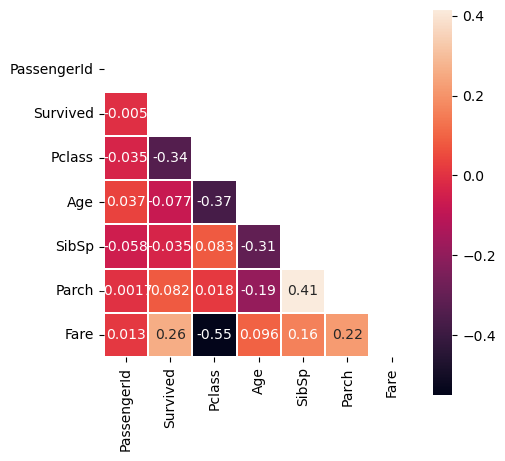

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, linewidth=0.3, annot=True, square=True,
           mask=mask)
plt.show()

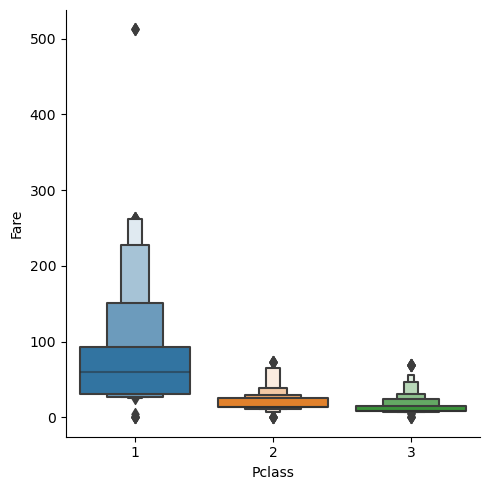

In [10]:
sns.catplot(x="Pclass", y="Fare", data=df, kind="boxen")
plt.show()

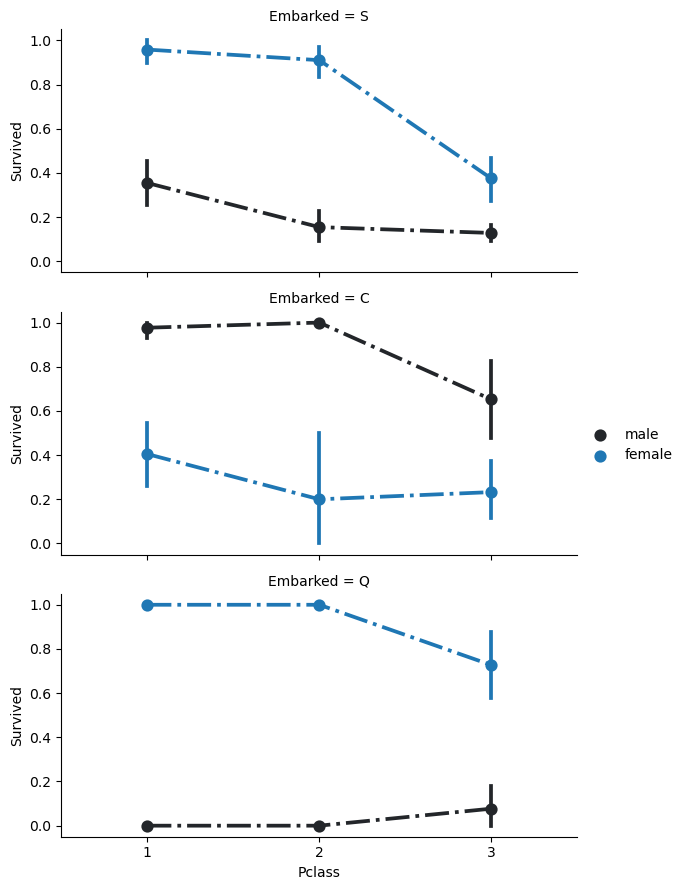

In [11]:
FacetGrid = sns.FacetGrid(df, row='Embarked', aspect=2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived','Sex',
              linestyles = '-.')
FacetGrid.add_legend()
plt.show()

From the above pointplots, we can see that embarking from Port Q has the worst survival chances for males,
but the best for women. Embarking from Port C gives the best chances of survival for men, but the worst for women. 
Pclass 3 seems to be the worst option. Survival rate always dips for both men and women, except for a slight increase for men who embarked from Port Q.

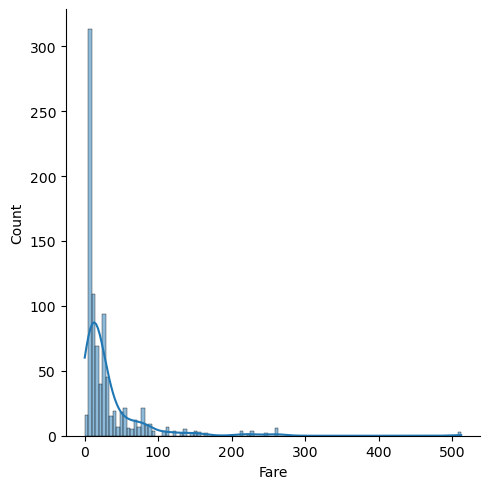

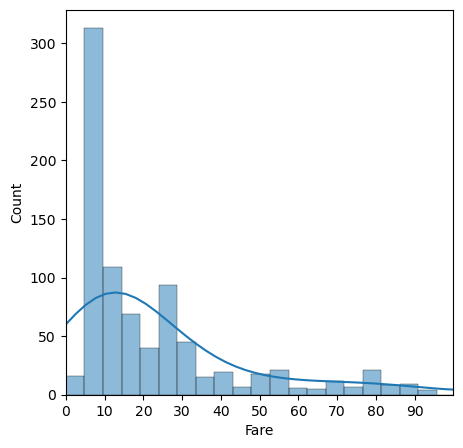

In [12]:
#Plot survival rate and Fare. Bin Fare into discrete groups
sns.displot(df["Fare"], kde=True)
plt.show()

fig,ax = plt.subplots()
sns.histplot(df["Fare"], kde=True, ax=ax)

ax.set_xlim(0,100)
ax.set_xticks(range(0,100,10))
plt.show()

From the above distribution plots, we can choose the appropriate bins. There seems to be a major fall off at the 35 and the 100 mark.
<ul> 
    <li>Low: 0 - 34</li>
    <li>Medium: 35 - 99</li>
    <li>High: 100+</li>
</ul>

In [13]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,35,100,600], labels=['Low','Mid','High'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mid
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mid
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Low


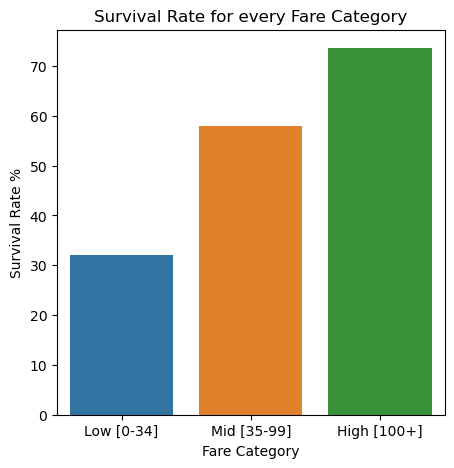

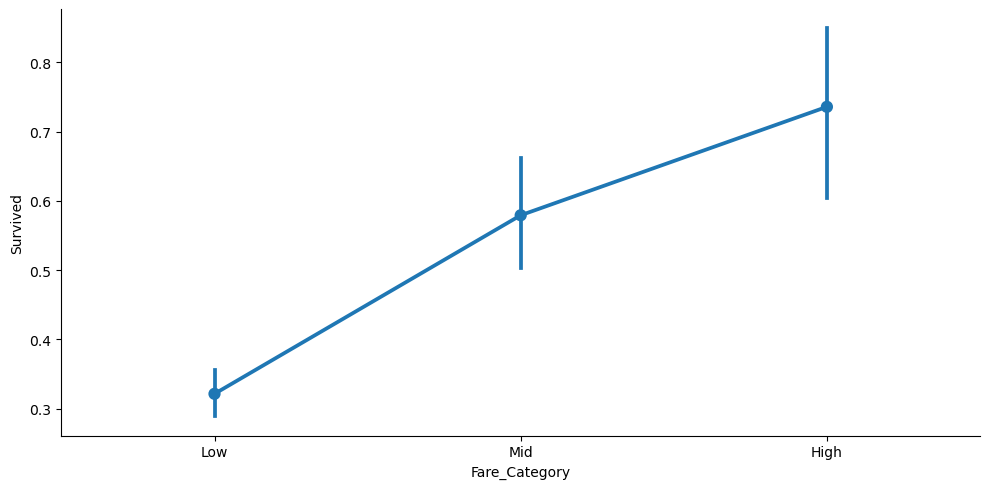

In [14]:
low  = df[df["Fare_Category"] == "Low"]
mid  = df[df["Fare_Category"] == "Mid"]
high = df[df["Fare_Category"] == "High"]

low_survived = low[low["Survived"] == 1].Survived.count()/low.Survived.count() * 100
mid_survived = mid[mid["Survived"] == 1].Survived.count()/mid.Survived.count() * 100
high_survived = high[high["Survived"] == 1].Survived.count()/high.Survived.count() * 100

fig,ax = plt.subplots()

plt.title('Survival Rate for every Fare Category')
plt.xlabel("Fare Category")
plt.ylabel("Survival Rate %")

sns.barplot(x=["Low [0-34]","Mid [35-99]","High [100+]"], y=[low_survived,mid_survived,high_survived])
sns.factorplot("Fare_Category", "Survived", data=df, aspect=2)
plt.show()

It seems that the fare is positively correlated with your chances of survival. We have seen that passengers who paid more where more likely to belong to Pclass 1. Moreover, we know that Pclass 1 <i>tends</i> to have the highest survival rate across all values of Embarked & Sex. So this conclusion makes sense.

### Does being with your family affect your chances of survival? 

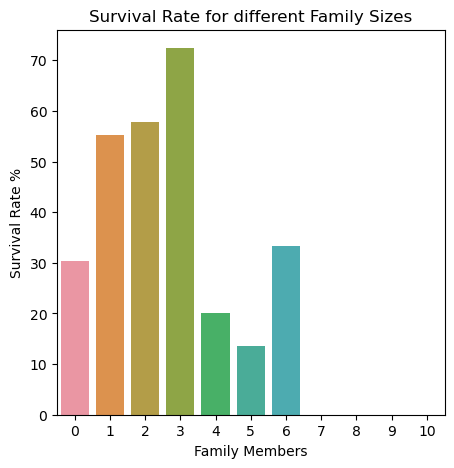

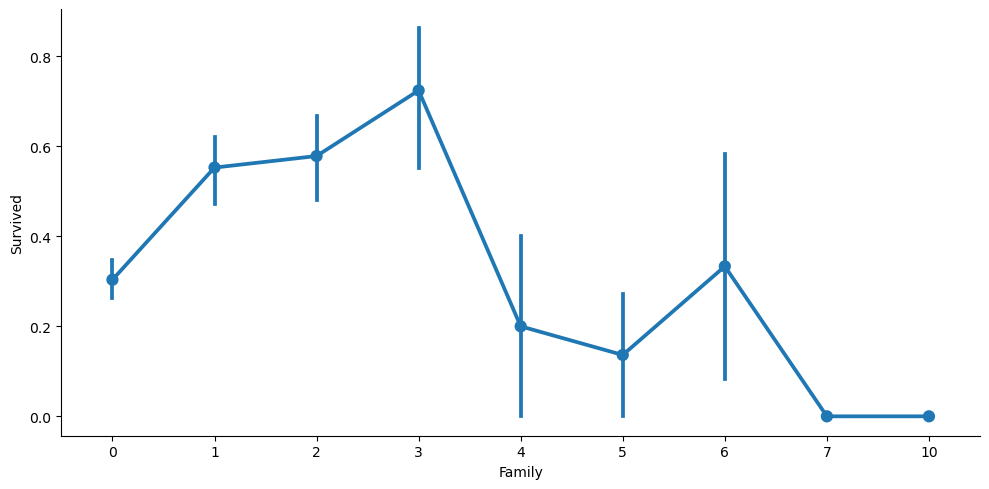

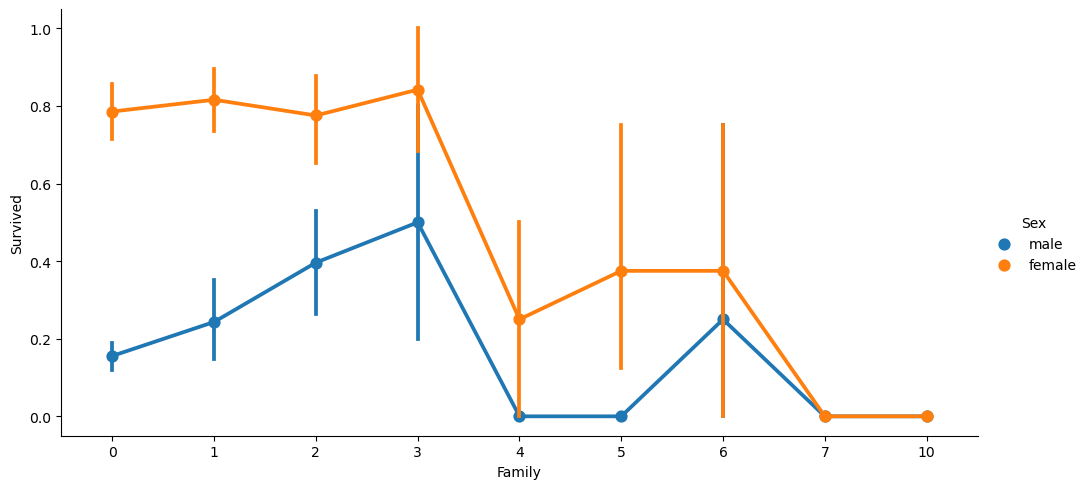

In [15]:
df['Family'] = df['SibSp']+df['Parch']
max = df["Family"].max()+1
arr = [None]*max

family = pd.DataFrame()

for i in range(max):
    survived = len(df[(df["Family"]==i) & (df["Survived"]==1)])
    total = len(df[df["Family"]==i])
    
    arr[i] = survived/total * 100 if total > 0 else 0
    
fig,ax = plt.subplots()

plt.title('Survival Rate for different Family Sizes')
plt.xlabel("Family Members")
plt.ylabel("Survival Rate %")

sns.barplot(x=[i for i in range(max)], y=arr)
sns.factorplot('Family', 'Survived', data=df, aspect=2)
sns.factorplot('Family', 'Survived', data=df, aspect=2, hue="Sex")
plt.show()


From the above graphs we can infer that having 3 family members gives the highest chances of survival, for both men and women. Going forward, I will remove SibSp and Parch from the dataset since Family will make up for them.

In [16]:
df = df.drop(columns=['SibSp', 'Parch'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Fare_Category,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Low,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Mid,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Low,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Mid,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Low,0


Moreover PassengerId and Ticket won't be useful in our prediction, so we can remove that aswell. We have binned Fare into 3 discrete groups, so we can remove it aswell.

In [17]:
df = df.drop(columns=['PassengerId', 'Ticket', 'Fare'])
df.head()

,Survived,Pclass,Name,Sex,Age,Cabin,Embarked,Fare_Category,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,NaN,S,Low,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C85,C,Mid,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,NaN,S,Low,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,C123,S,Mid,1
4,0,3,"Allen, Mr. William Henry",male,35.0,NaN,S,Low,0


## Imputing Age

In [18]:
#Impute Age missing values by getting the average age for that person's Sex, Pclass and Survived value.

df['Age'] = df['Age'].fillna(df.groupby(['Sex','Survived','Pclass'])['Age'].transform('mean'))

In [19]:
df.Age.isna().sum()

0